<a href="https://colab.research.google.com/github/colbyenbody/crypto_price_forecaster/blob/main/price_forecaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import matplotlib.dates as mdates
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.metrics import mean_absolute_error

In [3]:
files.upload()

Saving btcusd.csv to btcusd.csv


{'btcusd.csv': b'date,open,high,low,close,Volume,Name\r\n6/6/2021,35538.60938,36436.42188,35304.57813,35862.37891,28913440585,BTC\r\n6/7/2021,35835.26563,36790.57031,33480.64063,33560.70703,33683936663,BTC\r\n6/8/2021,33589.51953,34017.38672,31114.44336,33472.63281,49902050442,BTC\r\n6/9/2021,33416.97656,37537.37109,32475.86523,37345.12109,53972919008,BTC\r\n6/10/2021,37389.51563,38334.32422,35847.59375,36702.59766,43576032854,BTC\r\n6/11/2021,36697.03125,37608.69531,36044.44922,37334.39844,38699736985,BTC\r\n6/12/2021,37340.14453,37408.92578,34728.19141,35552.51563,37924228550,BTC\r\n6/13/2021,35555.78906,39322.78125,34864.10938,39097.85938,40669112838,BTC\r\n6/14/2021,39016.96875,40978.36328,38757.28516,40218.47656,43148914673,BTC\r\n6/15/2021,40427.16797,41295.26953,39609.46875,40406.26953,46420149185,BTC\r\n6/16/2021,40168.69141,40516.77734,38176.03516,38347.0625,39211635100,BTC\r\n6/17/2021,38341.42188,39513.67188,37439.67578,38053.50391,37096670047,BTC\r\n6/18/2021,38099.47656,38

In [4]:
# get csv data from github repository
url = 'btcusd.csv'
df = pd.read_csv(url)
df.reset_index(drop=True)
df.head()

,date,open,high,low,close,Volume,Name
0,6/6/2021,35538.60938,36436.42188,35304.57813,35862.37891,28913440585,BTC
1,6/7/2021,35835.26563,36790.57031,33480.64063,33560.70703,33683936663,BTC
2,6/8/2021,33589.51953,34017.38672,31114.44336,33472.63281,49902050442,BTC
3,6/9/2021,33416.97656,37537.37109,32475.86523,37345.12109,53972919008,BTC
4,6/10/2021,37389.51563,38334.32422,35847.59375,36702.59766,43576032854,BTC


In [5]:
#select btc in case of multiple cryptos available

btc_df = df.loc[df['Name'] == 'BTC']

In [6]:
# Change to datetime datatype.
btc_df.loc[:, 'date'] = pd.to_datetime(df.loc[:,'date'], format="%m/%d/%Y")

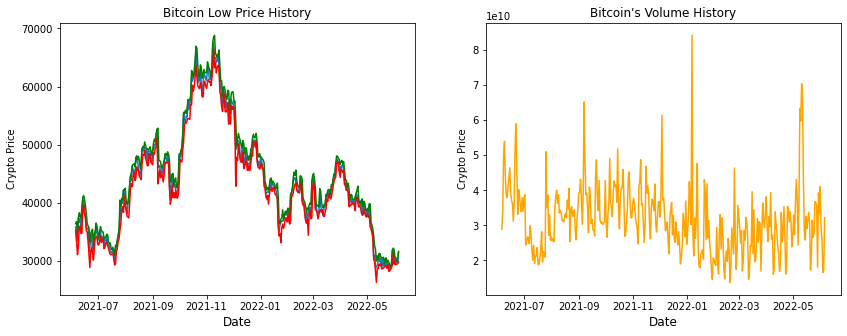

In [7]:
# Plot Bitcoin closing price
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(btc_df["date"], btc_df["close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Crypto Price")
ax1.set_title("Bitcoin Close Price History")

# Plot Bitcoin daily high price
ax1.plot(btc_df["date"], btc_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Crypto Price")
ax1.set_title("Bitcoin High Price History")

# Plot Bitcoin daily low price
ax1.plot(btc_df["date"], btc_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Crypto Price")
ax1.set_title("Bitcoin Low Price History")

# Plot Bitcoin daily volume
ax2.plot(btc_df["date"], btc_df["Volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Crypto Price")
ax2.set_title("Bitcoin's Volume History")
plt.show()

In [9]:
df.reset_index(drop=True)
m = Prophet()

# Drop the columns
ph_df = btc_df.drop(['open', 'high', 'low','Volume', 'Name'], axis=1)

ph_df.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
0,2021-06-06,35862.37891
1,2021-06-07,33560.70703
2,2021-06-08,33472.63281
3,2021-06-09,37345.12109
4,2021-06-10,36702.59766


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


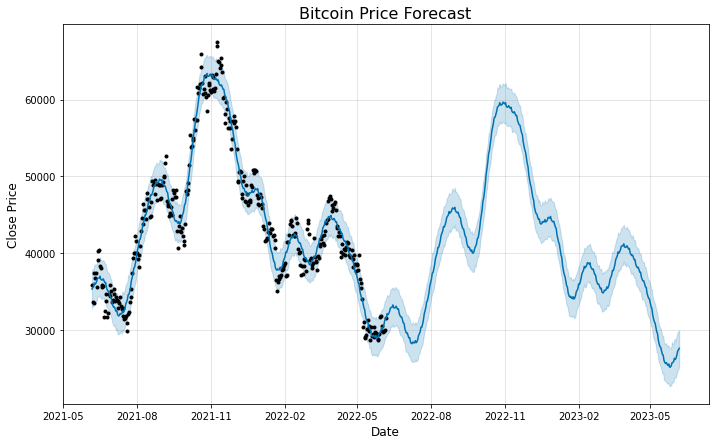

In [10]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(ph_df)

# Set the prediction timeframe in days
future_prices = m.make_future_dataframe(periods=365)

# Forecast future prices
forecast = m.predict(future_prices)

# Set dates
starting_date = dt.datetime(2021, 6, 6)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2021, 6, 7)
trend_date1 = mdates.date2num(trend_date)

# Plot forecast
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Bitcoin Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)
plt.show()

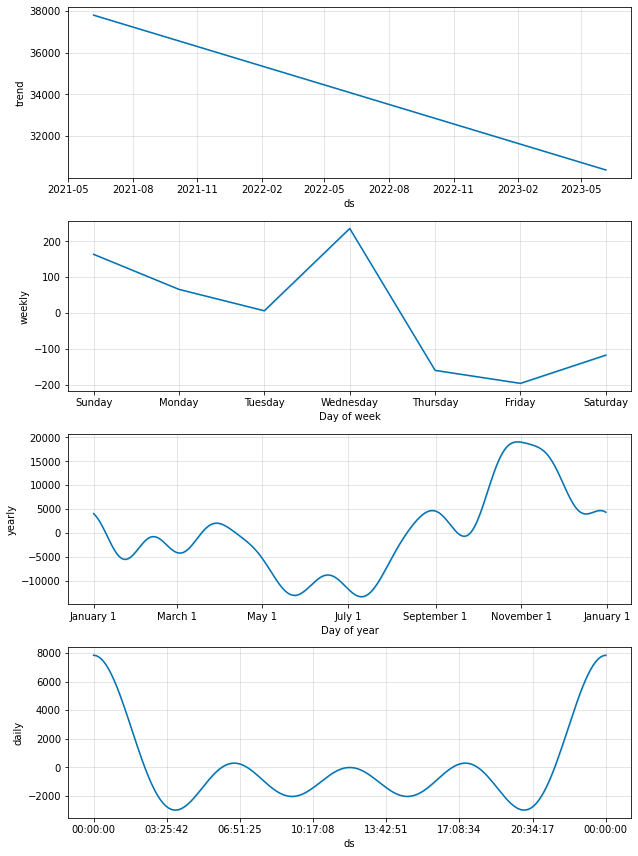

In [11]:
# this displays the components of the prediction
# in order: price trend, price change per day of week, price change throughout year, price change throughout a day

fig2 = m.plot_components(forecast)
plt.show()

How far out - in months - would you like to forecast: 8


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


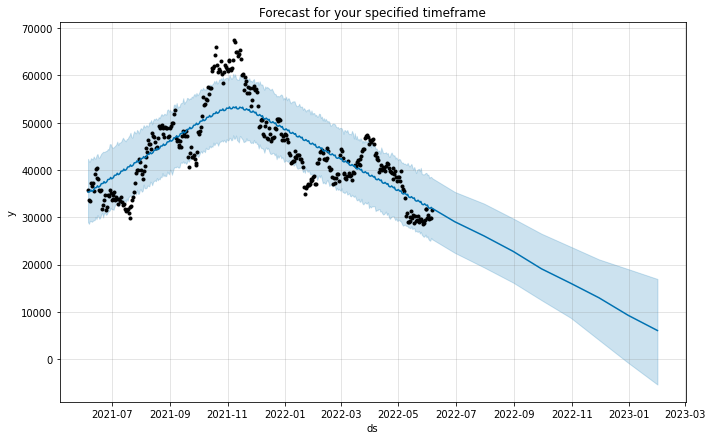

In [12]:
# forecast prices for a specified timeframe
# does not use yearly or daily seasonality

# while loop for input validation
while True:
    try:
        # enter an integer
        timeframe = int(input("How far out - in months - would you like to forecast: "))
    except ValueError:
        # if not an integer
        print("Sorry, try entering a number.")
        continue
        # check if timeframe is a positive int greater than 0
    if  timeframe < 1:
        print("Sorry, try entering a number above 0")
        continue
    else:
        # integer entered, exit loop
        break

m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=timeframe, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Forecast for your specified timeframe")
plt.show()

In [13]:
#combine forecast with actual data
metric_df = forecast.set_index('ds')[['yhat']].join(ph_df.set_index('ds').y).reset_index()
# drop NaN values
metric_df.dropna(inplace=True)
#display yhat and y
metric_df.tail()


,ds,yhat,y
361,2022-06-02,30127.685514,30467.48828
362,2022-06-03,30351.659743,29704.39063
363,2022-06-04,30698.467579,29832.91406
364,2022-06-05,31250.860157,29906.66211
365,2022-06-06,31422.702476,31524.64453


In [14]:
# display mean absolute value to evaluate accuracy
# the closer to 0 the more accurate the prediction
mean_absolute_error(metric_df.y, metric_df.yhat)

1561.454769999647